<a href="https://colab.research.google.com/github/MonicaAniedobe/RDAMP-Sales-Analysis/blob/main/PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd

# Load sales data
sales_df = pd.read_csv('/content/Ace Superstore Retail Dataset(in).csv', encoding='latin1')

# Load location data
location_df = pd.read_csv('/content/Store Locations(Store Locations).csv', encoding='latin1')

In [28]:
# Merge on 'City' to get the correct 'Region' from location_df
merged_df = pd.merge(
    sales_df,
    location_df[['City', 'Region']],
    on='City',
    how='left',
    suffixes=('', '_Correct')
)

# Replace missing or existing 'Region' values in sales_df with the correct ones from location_df
merged_df['Region'] = merged_df['Region_Correct'].combine_first(merged_df['Region'])

# Drop the helper 'Region_Correct' column
merged_df.drop('Region_Correct', axis=1, inplace=True)



In [42]:
# Split 'Category' column into 'Main Category' and 'Sub Category'
merged_df[['Main Category', 'Sub Category']] = merged_df['Category'].str.split(' - ', expand=True)

# Check the result

print(merged_df[['Main Category']].head(20))
# save merged_df
merged_df.to_csv('merged_data.csv', index=False)


   Main Category
0           Food
1           Food
2           Food
3    Accessories
4           Food
5           Food
6           Food
7           Food
8           Food
9           Home
10          Home
11          Home
12          Home
13          Home
14          Home
15          Food
16          Food
17          Food
18          Food
19          Food


In [43]:
# Convert 'Order Date' to datetime
merged_df['Order Date'] = pd.to_datetime(merged_df['Order Date'], errors='coerce')

# Fill missing 'Discount' with 0
merged_df['Discount'].fillna(0, inplace=True)

# Drop rows with missing essential numerical values
merged_df.dropna(subset=['Sales', 'Cost Price'], inplace=True)

# Create 'Revenue' = Sales × Quantity
merged_df['Revenue'] = merged_df['Sales'] * merged_df['Quantity']

# Create 'Profit' = (Sales - Cost Price) × Quantity
merged_df['Profit'] = (merged_df['Sales'] - merged_df['Cost Price']) * merged_df['Quantity']

# Final check on cleaned data
print(merged_df.head())
print(merged_df.info())

     Order ID Order Date Order Mode Customer ID      City Postal Code  \
0  BTC-245712 2024-06-22     Online    LO028977    Norton          S8   
1  BTC-245712 2024-06-22     Online    LO028977    Norton          S8   
2  NZR-891212 2024-03-15   In-Store    OH046670  West End        DN36   
3  TDN-811093 2024-02-29     Online    FH015492   Newtown        RG20   
4  MIX-746378 2024-10-25   In-Store    ZZ015342  East End        BH21   

   Country                    Region                  Product ID  \
0  England             East Midlands  01JZ3N512GHNAJSF3HCCQ0PQYY   
1  England  Yorkshire and the Humber  01JZ3N512GHNAJSF3HCCQ0PQYY   
2  England             East Midlands  01JZ3N56DDVK7Y600QGH2M6T1X   
3  England                South East  01JZ3N53A64TW72TVK28SMMXKX   
4  England                North West  01JZ3N572S4RVA29Y33YRWH174   

           Product Name  ...    Sub-Category  Sales  Cost Price  Quantity  \
0  Flavored Popcorn Mix  ...  Gourmet Snacks   2.99       0.897         4  

In [46]:
# Summary by Region and Main Category
summary = merged_df.groupby(['Region', 'Main Category']).agg({
    'Sales': 'sum',
    'Revenue': 'sum',
    'Discount': 'mean'
}).reset_index().round(2)

print(summary.head())

          Region Main Category    Sales   Revenue  Discount
0  East Midlands   Accessories  1401.42  15900.94      0.18
1  East Midlands          Apps    50.65    270.98      0.09
2  East Midlands  Art Supplies   171.81   1305.00      0.12
3  East Midlands         Audio  1527.57  12479.43      0.17
4  East Midlands    Automotive   566.24   7072.67      0.16


In [47]:
# Top 5 best-selling products
top_products = merged_df.groupby('Product Name')['Revenue'].sum().reset_index().sort_values(by='Revenue', ascending=False).head(5)
print("Top 5 Best-Selling Products:")
print(top_products)

# Bottom 5 underperforming products
bottom_products = merged_df.groupby('Product Name')['Revenue'].sum().reset_index().sort_values(by='Revenue').head(5)
print("\nBottom 5 Underperforming Products:")
print(bottom_products)


Top 5 Best-Selling Products:
                       Product Name    Revenue
1204       Portable Solar Generator  113572.51
443                  Digital Camera   75705.31
1200  Portable Refrigerator Freezer   64900.37
484                   Electric Bike   64827.08
720               Home Office Chair   58262.00

Bottom 5 Underperforming Products:
                Product Name  Revenue
297   Cinnamon Raisin Bagels     6.38
87               Baking Soda     8.77
188       Canned Black Beans     9.03
563      Flavored Rice Cakes    17.88
1554            Tomato Paste    19.41


/tmp/ipython-input-54-2009021989.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Revenue', y='Product Name', data=top_products, palette='coolwarm')


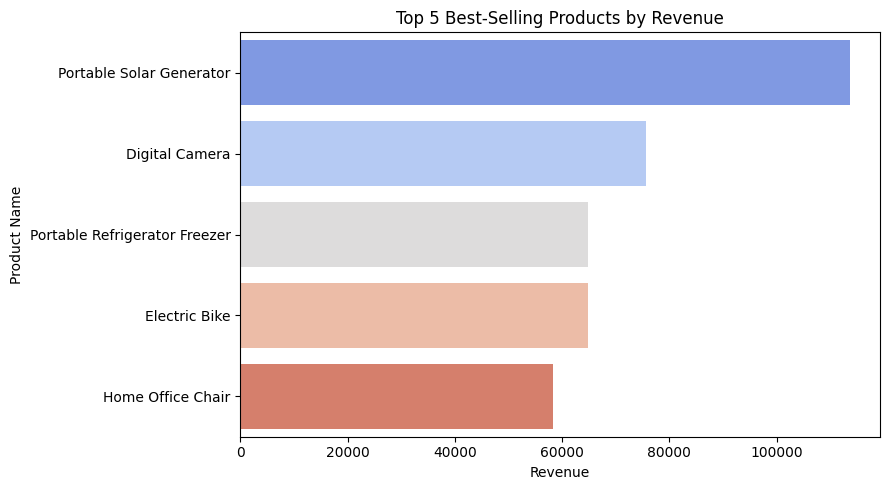

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(9,5))
sns.barplot(x='Revenue', y='Product Name', data=top_products, palette='coolwarm')
plt.title('Top 5 Best-Selling Products by Revenue')
plt.xlabel('Revenue')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()

In [56]:
# Profit by Main Category
category_profit = merged_df.groupby('Main Category')['Profit'].sum().reset_index().sort_values(by='Profit', ascending=False)
print(category_profit)


       Main Category      Profit
29           Outdoor  416186.855
26           Kitchen  409559.585
10          Clothing  354557.532
13       Electronics  278312.173
15              Food  263363.250
22              Home  233897.082
14           Fitness  173835.283
23   Home Appliances  140304.963
21            Health  132721.823
30              Pets  110836.555
37              Toys   91184.513
3              Audio   72112.006
0        Accessories   70580.512
28            Office   67194.820
19            Garden   63797.690
31       Photography   52363.904
17         Furniture   46917.386
27             Music   45887.914
8           Bicycles   42078.351
33        Smart Home   41190.903
39     Wearable Tech   39003.377
18            Gaming   38379.995
7             Beauty   35368.322
4         Automotive   29151.454
25     Home Security   25444.755
36             Tools   24843.637
2       Art Supplies   21077.334
38            Travel   18829.756
9              Books   17015.111
16        

/tmp/ipython-input-57-2551186819.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Profit', y='Main Category', data=category_profit, palette='crest')


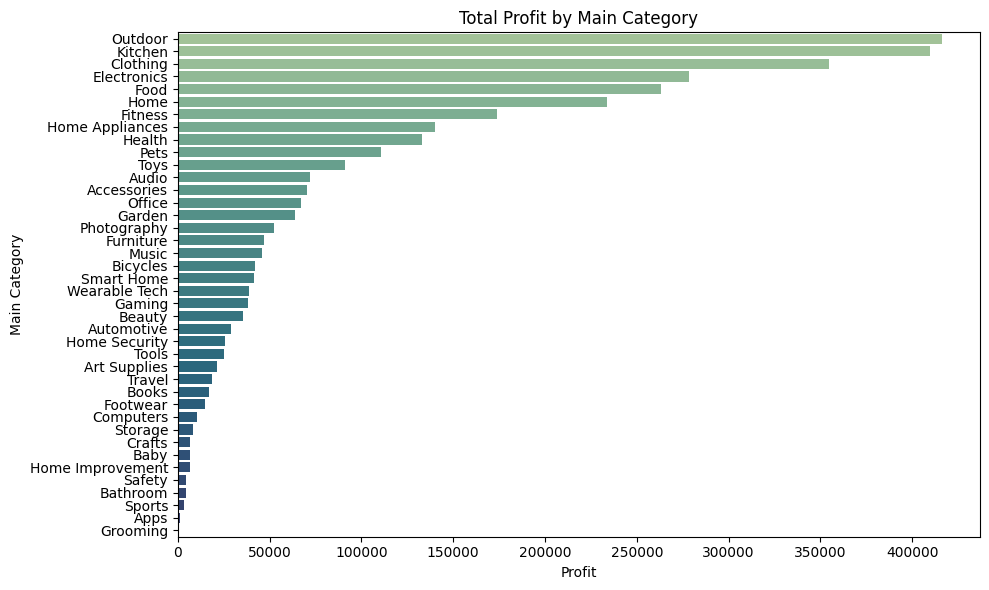

In [57]:
plt.figure(figsize=(10,6))
sns.barplot(x='Profit', y='Main Category', data=category_profit, palette='crest')
plt.title('Total Profit by Main Category')
plt.xlabel('Profit')
plt.ylabel('Main Category')
plt.tight_layout()
plt.show()


In [58]:
# Revenue by Order Mode
order_mode_sales = merged_df.groupby('Order Mode')['Revenue'].sum().reset_index()
print(order_mode_sales)


  Order Mode     Revenue
0   In-Store  2509922.59
1     Online  2694175.12


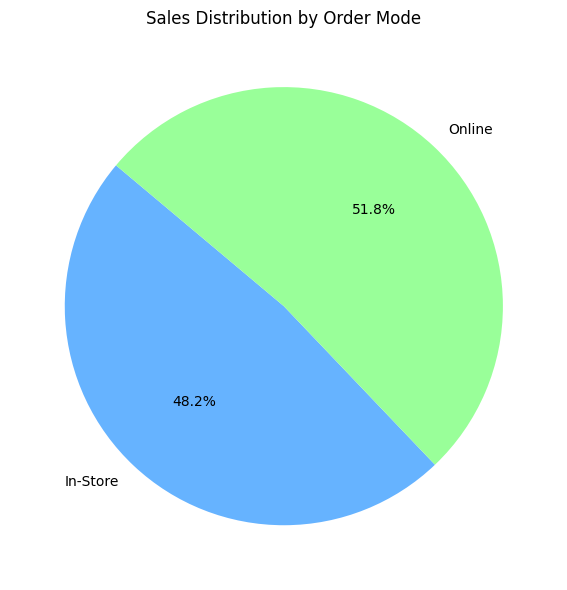

In [59]:
plt.figure(figsize=(6,6))
plt.pie(order_mode_sales['Revenue'], labels=order_mode_sales['Order Mode'], autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#99ff99'])
plt.title('Sales Distribution by Order Mode')
plt.tight_layout()
plt.show()


/tmp/ipython-input-62-3517603954.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Revenue', y='Region', data=region_revenue, palette='viridis')


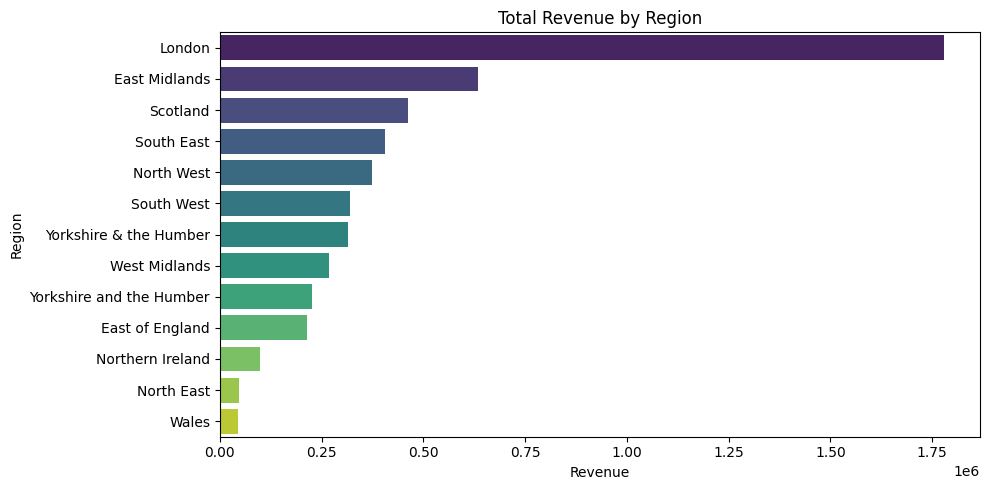

In [62]:
region_revenue = merged_df.groupby('Region')['Revenue'].sum().reset_index().sort_values(by='Revenue', ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x='Revenue', y='Region', data=region_revenue, palette='viridis')
plt.title('Total Revenue by Region')
plt.xlabel('Revenue')
plt.ylabel('Region')
plt.tight_layout()
plt.show()
